In [86]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
from matplotlib.colors import LogNorm

In [87]:
kuni_users_profiles = pd.read_csv('mastodon_profiles_github.tsv', sep='\t')
kuni_users_profiles.columns = ['index', 'mastodon_name', 'displayname', 'twitterhandler', 'followers', 'following', 'created', 'bio', 'field']
print(kuni_users_profiles.head())
kuni_users_profiles = kuni_users_profiles.dropna(subset='created',axis=0)

datetime_str = '%Y-%m-%d'

datetime_created = []
for str_date in kuni_users_profiles['created'].values:
    try:
        obj = datetime.datetime.strptime(str_date[:10], datetime_str)
    except:
        obj = datetime.datetime(2020, 1, 1)
    datetime_created.append(obj)
kuni_users_profiles['created_datetime'] = datetime_created

print(kuni_users_profiles.head())

   index                     mastodon_name       displayname twitterhandler  \
0    0.0              rheinze@assemblag.es     Robert Heinze            NaN   
1    1.0           BrianJAP@mastodon.world  Brian J Peterson            NaN   
2    2.0       joelglasman@fediscience.org      Joël Glasman            NaN   
3    3.0  brenton_peterson@sciences.social  Brenton Peterson            NaN   
4    4.0         keremd@social.anoxinon.de      Kerem Duymus            NaN   

   followers following                    created  \
0     1041.0       245  2022-11-04 00:00:00+00:00   
1      232.0       239  2022-11-20 00:00:00+00:00   
2      864.0      1303  2022-11-04 00:00:00+00:00   
3      760.0       301  2022-11-01 00:00:00+00:00   
4      179.0       789  2022-04-25 00:00:00+00:00   

                                                 bio  \
0  <p>Historian, Deutsches Historisches Institut ...   
1  <p>Historian and professor at Union College in...   
2  <p>historian. global history, human

In [88]:
kuni_users_profiles.sort_values('followers', ascending=False).head(5)

,index,mastodon_name,displayname,twitterhandler,followers,following,created,bio,field,created_datetime
6478,6478.0,gargron@mastodon.social,Eugen Rochko,NaN,331030.0,417,2016-03-16 00:00:00+00:00,"<p>Founder, CEO and lead developer <span class...","{'name': 'GitHub', 'value': '<a href=""https://...",2016-03-16
4379,4379.0,mollyjongfast@journa.host,Molly JongFast,NaN,115216.0,81,2022-11-05 00:00:00+00:00,<p>Vanity Fair and Fast Politics</p>,"{'name': 'My links', 'value': '<a href=""https:...",2022-11-05
4472,4472.0,juddlegum@journa.host,Judd Legum,"<span class=""h-card""><a href=""https://journa.h...",106444.0,182,2022-11-05 00:00:00+00:00,"<p>Founder and author of Popular Information, ...","{'name': 'Twitter', 'value': '<span class=""h-c...",2022-11-05
5189,5189.0,ProPublica@newsie.social,ProPublica,NaN,88084.0,140,2022-11-18 00:00:00+00:00,<p>The official Mastodon page for ProPublica.<...,"{'name': 'Verified Journalist', 'value': '<a h...",2022-11-18
188,188.0,auschwitzmuseum@mastodon.world,Auschwitz Memorial,NaN,84671.0,43,2022-11-18 00:00:00+00:00,<p>Former German Nazi concentration &amp; exte...,"{'name': 'Podcast', 'value': '<a href=""http://...",2022-11-18


12098


/mnt/d/temporary/ipykernel_21509/1992220934.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('mastodon_accounts_created_at.png', tight_layout=True)


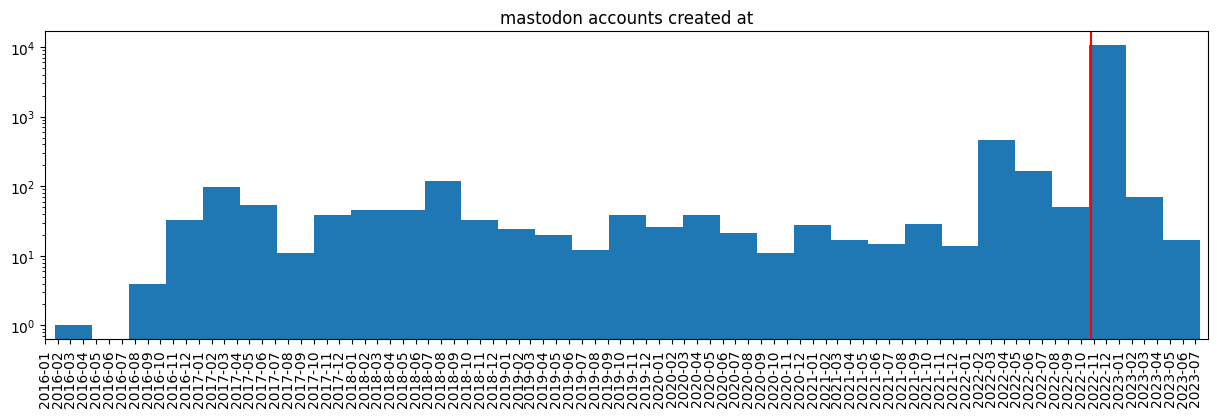

In [122]:
x = kuni_users_profiles['created_datetime']
print(len(x))
plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=150)
plt.axvline(x=datetime.date(2022, 10, 26), color='red')

ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
plt.xlim(datetime.date(2016, 1, 1),datetime.date(2023, 7, 30))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('mastodon accounts created at')
plt.savefig('mastodon_accounts_created_at.png', tight_layout=True)

In [128]:
import glob

files = glob.glob('temp/users_toots_github_2023-08*') + glob.glob('temp/users_toots_github_2023-07*')
print(len(files))
toots_git = []
for file in files: 
    toots_git.append(pd.read_csv(file, sep='\t'))
print(len(toots_git))
toots = pd.concat(toots_git)

toot_created = []
i = 0
datetime_str = ''
for str_date in toots['created_at'].values:
    try:
        obj = datetime.datetime.strptime(str_date[:-4], '%Y-%m-%dT%H:%M:%S.')
    except:
        obj = datetime.datetime(2023,1,1)
    toot_created.append(obj)
toots['created_datetime'] = toot_created
toots = toots.drop(columns = ['created_at', 'in_reply_to_account_id', 'Unnamed: 0'], axis=1)

63
63


In [129]:
mastodon_names = []
for idx, row in toots.iterrows():
    uri_parts = row['uri'][8:].split('/')
    mastodon_name = uri_parts[2] + '@' + uri_parts[0]
    mastodon_names.append(mastodon_name)
    
toots['mastodon_name'] = mastodon_names

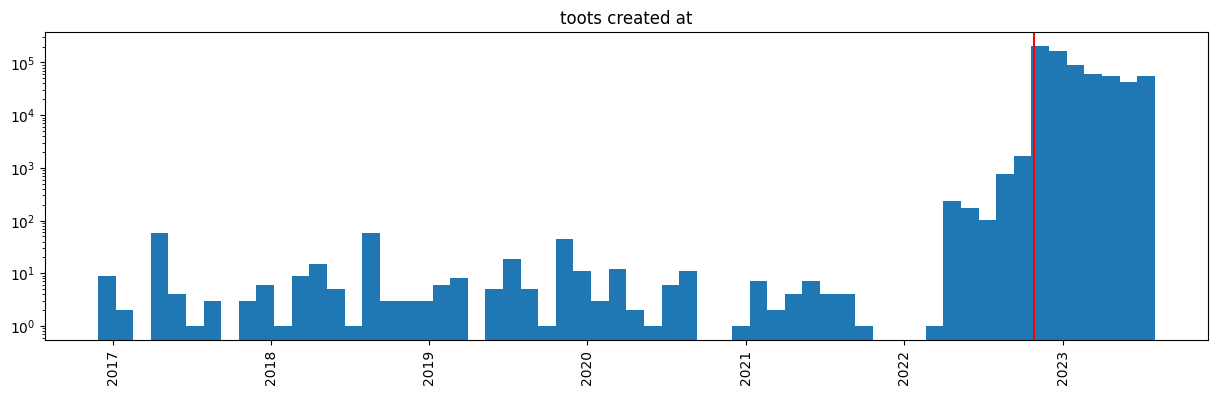

In [130]:
x = toots['created_datetime']

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=60)
plt.axvline(x=datetime.date(2022, 10, 27), color='red')

ax = plt.gca()
ax.xaxis_date()
# ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("toots created at")
plt.show()

In [131]:
## selecionar o subconjunto de autores que criaram a conta quando o elon musk anunciou a compra do twitter (efetivada)

## verificar as séries temporais de números de toots

kuni_users_profiles['profile_created_at'] = pd.to_datetime(kuni_users_profiles["created_datetime"]).dt.date
print(kuni_users_profiles.head())

after_elon = kuni_users_profiles[kuni_users_profiles['profile_created_at'] >= datetime.date(2022, 9, 1)]
print(len(after_elon))

   index                     mastodon_name       displayname twitterhandler  \
0    0.0              rheinze@assemblag.es     Robert Heinze            NaN   
1    1.0           BrianJAP@mastodon.world  Brian J Peterson            NaN   
2    2.0       joelglasman@fediscience.org      Joël Glasman            NaN   
3    3.0  brenton_peterson@sciences.social  Brenton Peterson            NaN   
4    4.0         keremd@social.anoxinon.de      Kerem Duymus            NaN   

   followers following                    created  \
0     1041.0       245  2022-11-04 00:00:00+00:00   
1      232.0       239  2022-11-20 00:00:00+00:00   
2      864.0      1303  2022-11-04 00:00:00+00:00   
3      760.0       301  2022-11-01 00:00:00+00:00   
4      179.0       789  2022-04-25 00:00:00+00:00   

                                                 bio  \
0  <p>Historian, Deutsches Historisches Institut ...   
1  <p>Historian and professor at Union College in...   
2  <p>historian. global history, human

In [94]:
toots.columns

Index(['id', 'uri', 'replies_count', 'reblogs_count', 'favourites_count',
       'content', 'user_id', 'created_datetime', 'mastodon_name'],
      dtype='object')

###### after_elon.columns

In [132]:
after_elon = after_elon.merge(toots, on='mastodon_name')

In [133]:
after_elon.columns

Index(['index', 'mastodon_name', 'displayname', 'twitterhandler', 'followers',
       'following', 'created', 'bio', 'field', 'created_datetime_x',
       'profile_created_at', 'id', 'uri', 'replies_count', 'reblogs_count',
       'favourites_count', 'content', 'user_id', 'created_datetime_y'],
      dtype='object')

In [134]:
def frequency(toots):
    if len(toots) >= 5:
        diffs = []
        for idx,row in toots.iterrows():
            diff = row['created_datetime_y'].to_pydatetime().date() - row['profile_created_at']
            diffs.append(diff.days//7)    
        return diffs
    else:
        return []
    
after_elon_freq = after_elon.groupby('mastodon_name').apply(frequency)

In [135]:
len(after_elon_freq)

2855

In [136]:
after_elon_freq

mastodon_name
1nchntd1@mstdn.social              [13, 13, 10, 10, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6,...
AFabregasTejeda@mstdn.social       [3, 1, 1, 1, 0, 3, 1, 1, 1, 0, 3, 1, 1, 1, 0, ...
AKOrgaBewertung@mastodon.social    [38, 26, 26, 19, 16, 16, 16, 13, 10, 7, 7, 7, ...
AL_marmo@mstdn.social                                              [13, 11, 9, 6, 5]
AMPHORA@mas.to                     [27, 17, 6, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0...
                                                         ...                        
zpneal@mastodon.social             [39, 39, 39, 39, 38, 38, 38, 38, 37, 37, 37, 3...
zsuzsakaldy@fediscience.org        [25, 25, 15, 6, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, ...
zukunftsheld@mastodon.social       [37, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3...
zumhagenyekple@zirk.us             [5, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
zzgsdddz@mstdn.social                                                             []
Length: 2855, dtype: object

In [138]:
X = []
Y = []
for row in after_elon_freq:
    unique, count = np.unique(row, return_counts=True)
    X.append(unique)
    Y.append(count)

X = np.concatenate(X)
Y = np.concatenate(Y)

4192
42.0


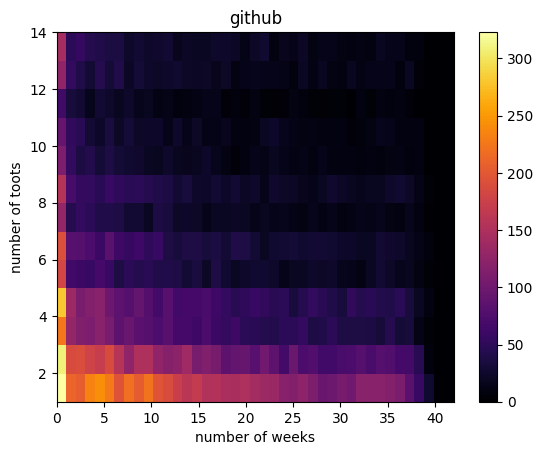

In [139]:
# fig, ax = plt.subplots(figsize=(12,4))
# width = 0.25  # the width of the bars
# multiplier = 0
# X = np.arange(X_weeks)
# kuni_list_size = 4309

print(max(Y))
print(max(X))
xbins = np.linspace(min(X), max(X), 42)
ybins = np.linspace(min(Y), 14, 14)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(X, Y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('number of weeks')
ax.set_ylabel('number of toots')
plt.colorbar(im[3], ax=ax)


# for min_number_of_toots in [1, 5, 10]:
#     Y = []
#     for i in range(X_weeks):
#         y = [True for week in to_plot if week[i] >= min_number_of_toots]
#         y = 100*len(y)/kuni_list_size
#         Y.append(y)
        
#     offset = width * multiplier
#     rects = ax.bar(X + offset, Y, width, label=min_number_of_toots)
#     multiplier += 1

# plt.xlabel('toots published after x weeks')
# plt.ylabel('%')
# plt.xticks(X)
# plt.legend()
plt.title('github')
plt.savefig('mastodon_toots_freq.png')

12920
9


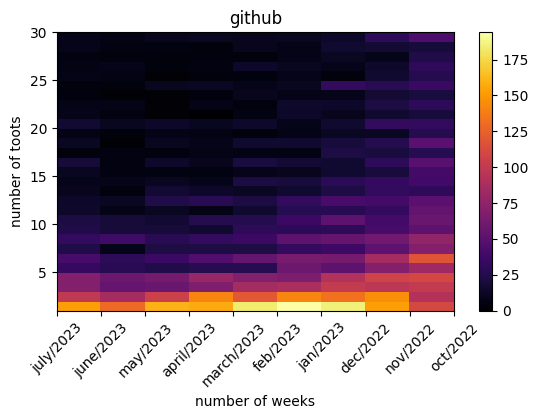

In [141]:
def frequency(toots):
    if len(toots) >= 5:
        diffs = []
        for idx,row in toots.iterrows():
            diff = datetime.date(2023, 7, 30) - row['created_datetime_y'].to_pydatetime().date()
            diffs.append(diff.days//30)    
        return diffs
    else:
        return []
    
after_elon_freq = after_elon.groupby('mastodon_name').apply(frequency)

X_weeks = 10
X = []
Y = []
to_plot = []
for row in after_elon_freq:
    unique, count = np.unique(row, return_counts=True)
    week_hist = []
    for week in range(X_weeks):
        temp = count[unique == week]
        if len(temp) == 0:
#             Y.append(0)
            pass
        else:
            Y.append(temp[0])
            X.append(week)
    
print(max(Y))
print(max(X))
xbins = np.linspace(min(X), 9, 10)
ybins = np.linspace(min(Y), 30, 30)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(X, Y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
ax.set_xlabel('number of weeks')
ax.set_ylabel('number of toots')
plt.xticks(xbins, ['july/2023', 'june/2023', 'may/2023', 'april/2023', 'march/2023', 'feb/2023', 'jan/2023', 'dec/2022', 'nov/2022', 'oct/2022'], rotation=45)
plt.colorbar(im[3], ax=ax)
plt.title('github')
plt.subplots_adjust(bottom=0.3)
plt.savefig('mastodon_toots_freq_last_months.png')